### Boston House Price Prediction Project  
In this project you will work on developing an end to end machine learning project using linear regression, as this will be your first project in your machine learning journey. 
We will be doing extensive data visualization, we will perform data feature engineering, we will also see how we can select features based on the correlation of the features.

In [46]:
import numpy as np 
import pandas as pd

import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [57]:

"""
from sklearn.datasets import load_boston 
load_boston = load_boston() 
X = load_boston.data 
y = load_boston.target 


data = pd.DataFrame(X, columns=load_boston.feature_names) 
data["SalePrice"] = y # saleprice 
data.head() 
"""

'\nfrom sklearn.datasets import load_boston \nload_boston = load_boston() \nX = load_boston.data \ny = load_boston.target \n\n\ndata = pd.DataFrame(X, columns=load_boston.feature_names) \ndata["SalePrice"] = y # saleprice \ndata.head() \n'

In [82]:
"""
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
data.to_csv('out.zip', index=False,
          compression=compression_opts) 
 """
data=pd.read_csv('Boston.csv')
data.head() 

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [62]:
print(data.shape) 

(506, 15)


In [78]:
target=data['medv']

In [63]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [64]:
data.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### EDA 

In [65]:
data.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

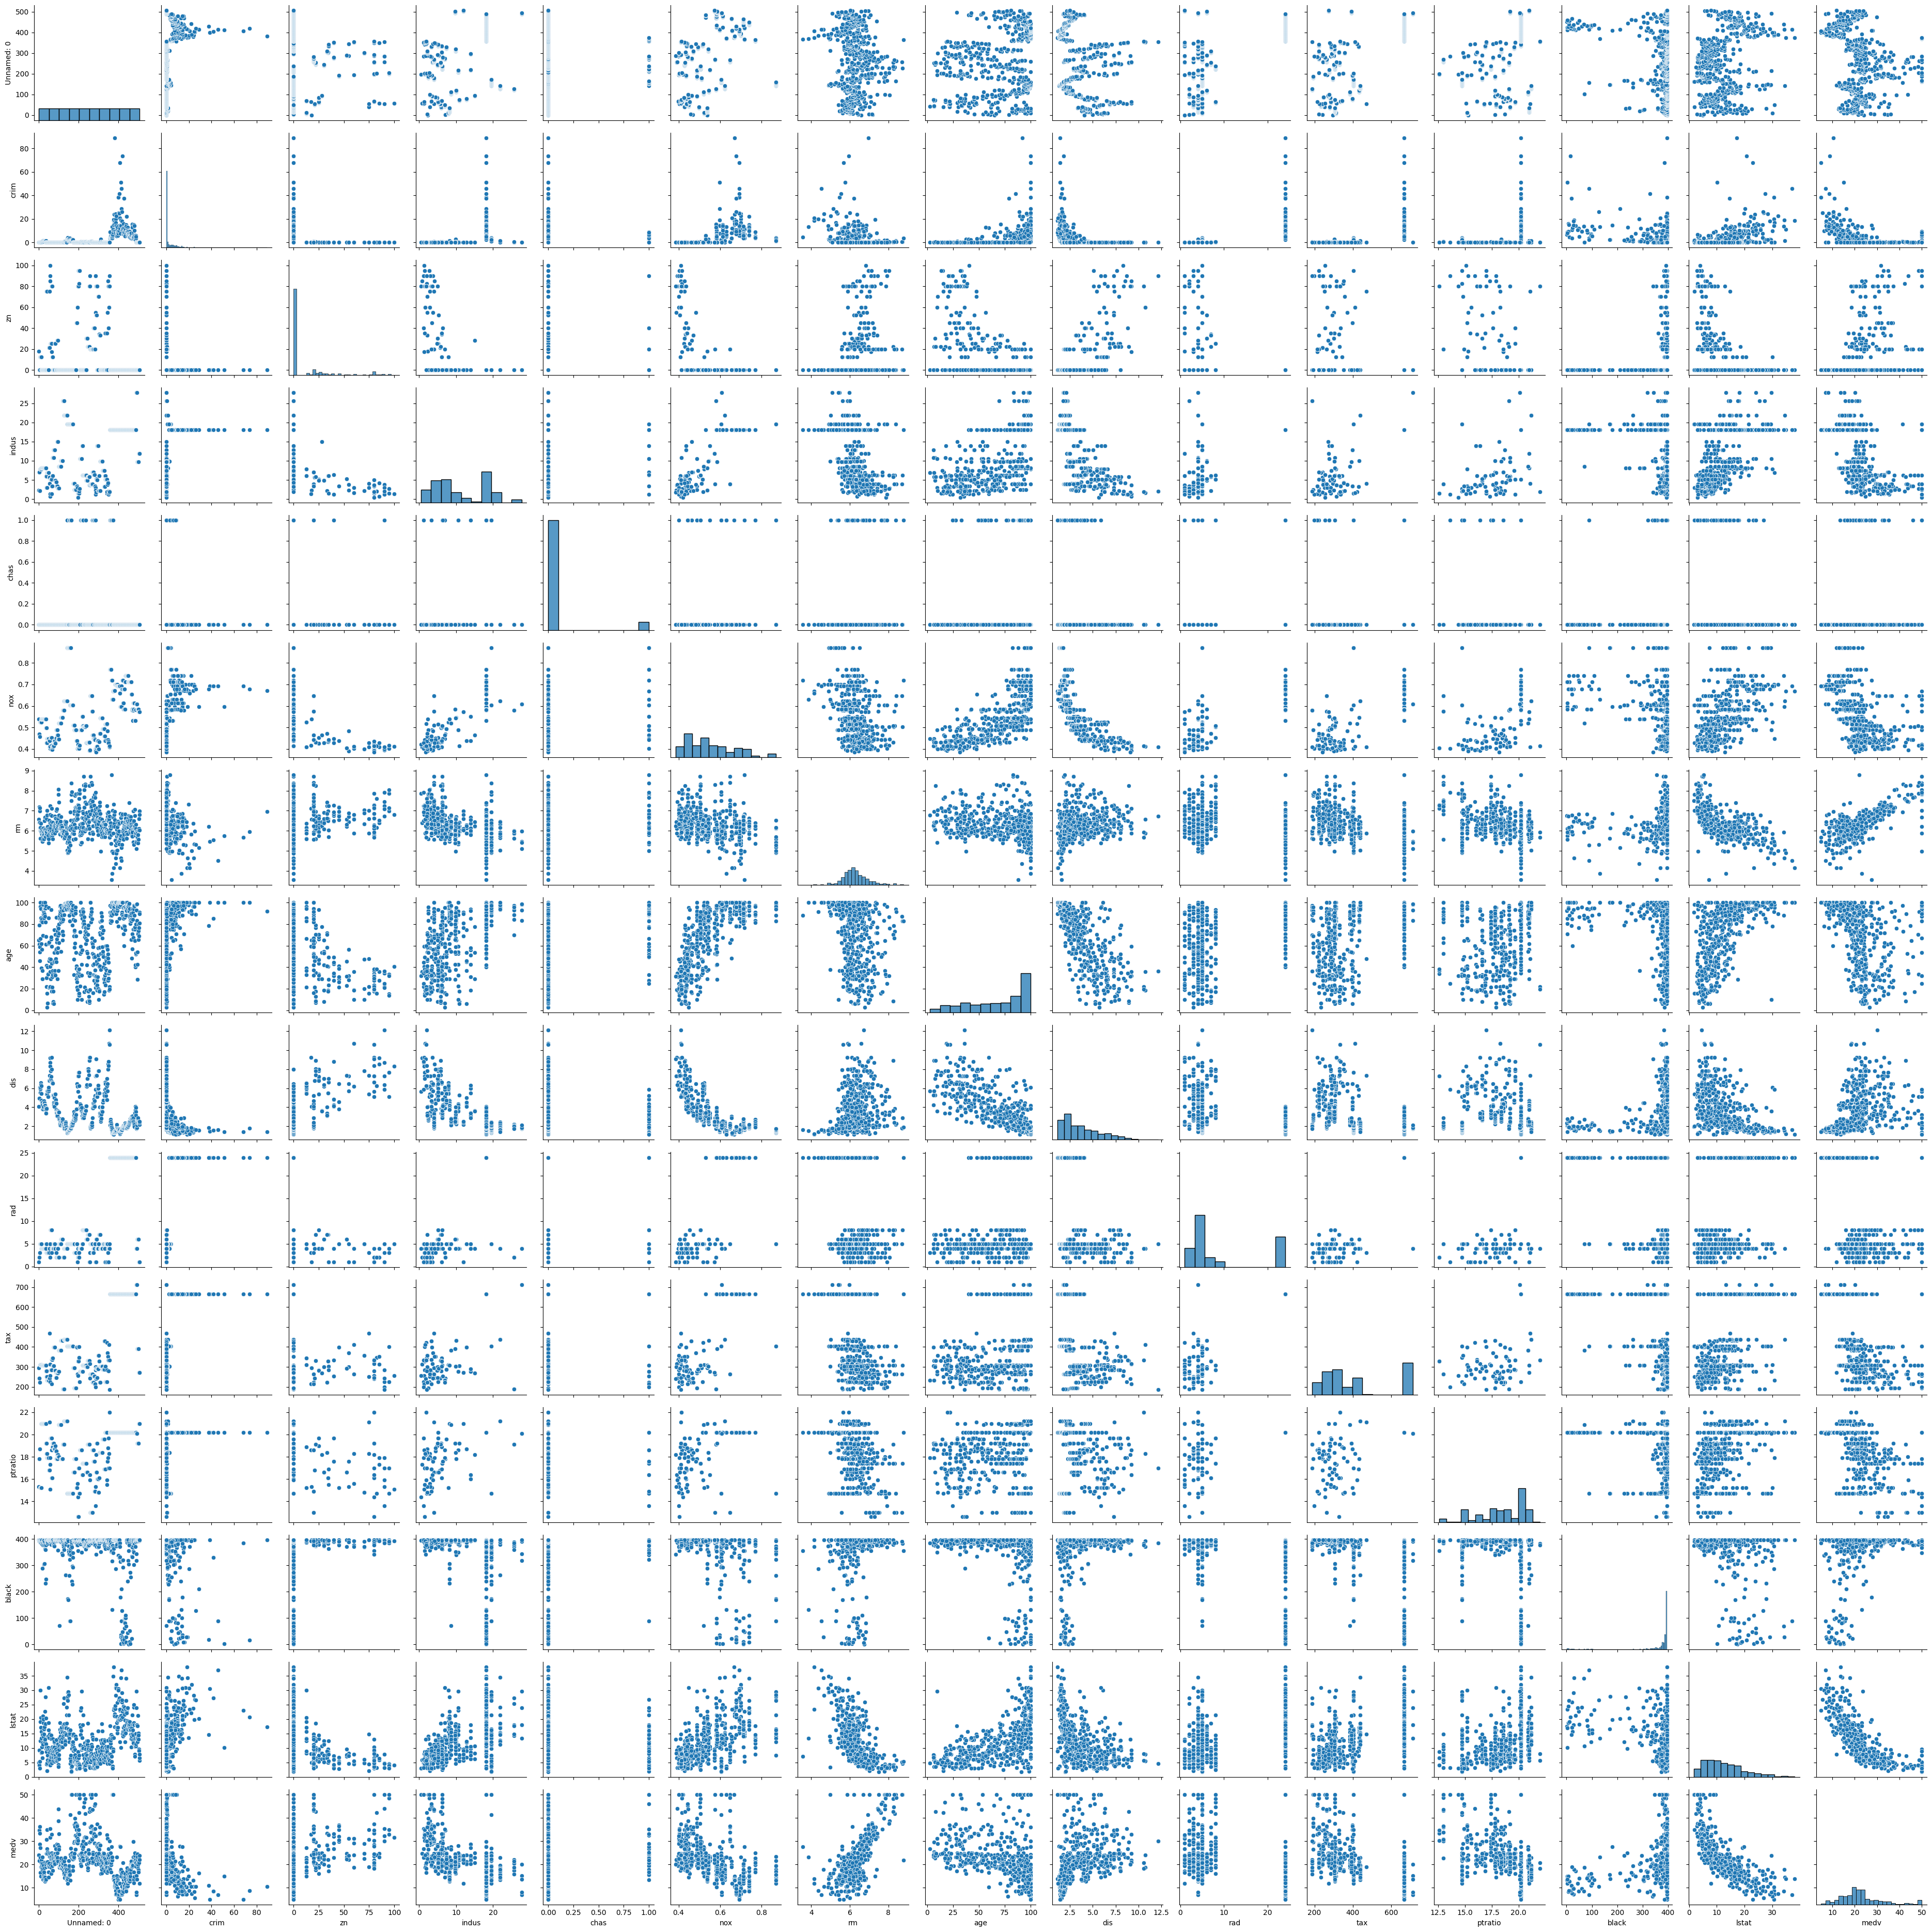

In [66]:
sns.pairplot(data, height=2.5)
plt.tight_layout()

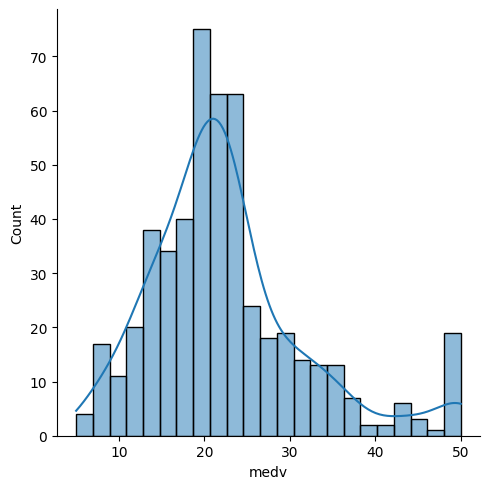

In [81]:

sns.displot(data['medv'],kde=True);

In [84]:
print("Skewness: %f" % data['medv'].skew())
print("Kurtosis: %f" % data['medv'].kurt())

Skewness: 1.108098
Kurtosis: 1.495197


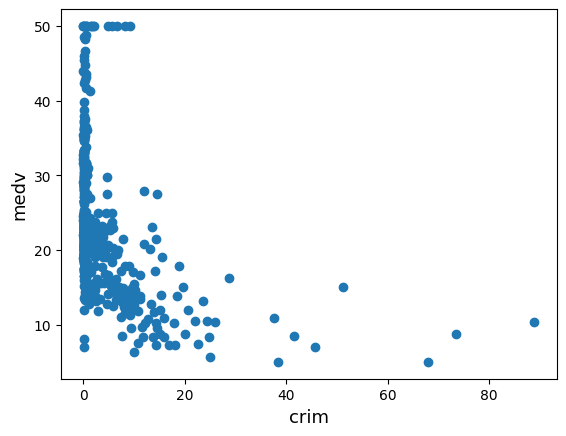

In [86]:
fig, ax = plt.subplots()
ax.scatter(x = data['crim'], y = data['medv'])
plt.ylabel('medv', fontsize=13)
plt.xlabel('crim', fontsize=13)
plt.show()

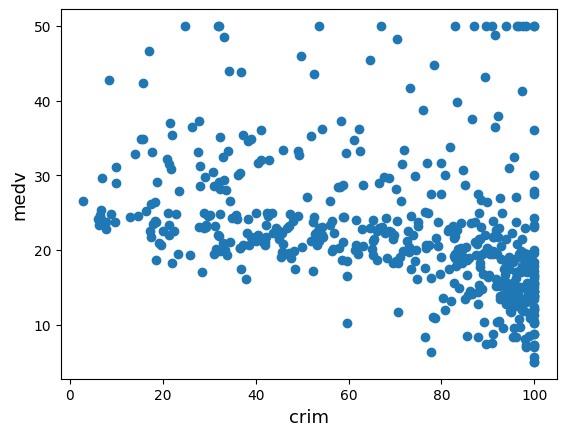

In [87]:
fig, ax = plt.subplots()
ax.scatter(x = data['age'], y = data['medv'])
plt.ylabel('medv', fontsize=13)
plt.xlabel('crim', fontsize=13)
plt.show()


 mu = 0.33 and sigma = 0.01



<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
C:\Users\shami\AppData\Local\Temp\ipykernel_11848\2366291585.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
C:\Users\shami\AppData\Local\Temp\ipykernel_11848\2366291585.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['medv'] , fit=norm);


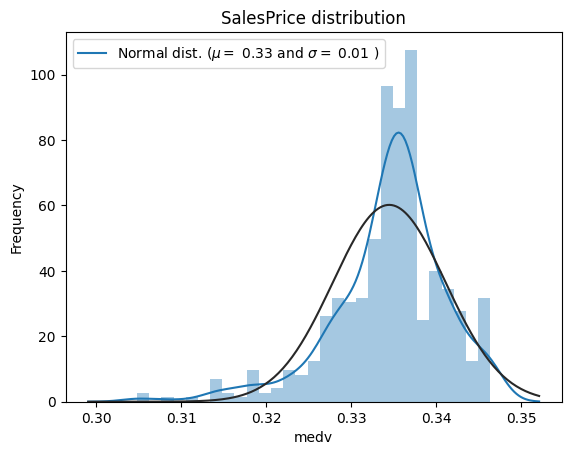

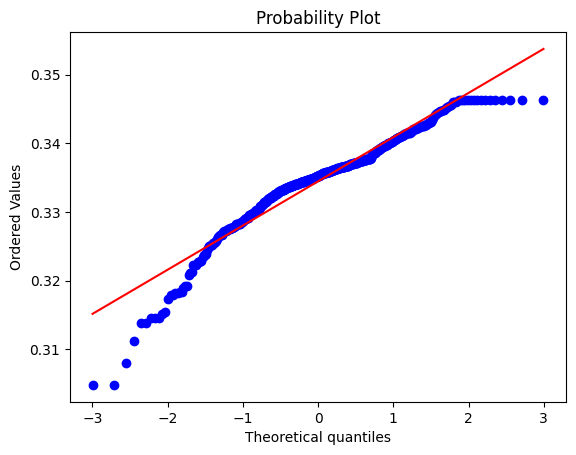

In [103]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(data['medv'] , fit=norm);

(mu, sigma) = norm.fit(data['medv'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalesPrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['medv'], plot=plt)
plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
C:\Users\shami\AppData\Local\Temp\ipykernel_11848\1799187817.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Normal dist. ($\mu =$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
C:\Users\shami\AppData\Local\Temp\ipykernel_11848\1799187817.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['medv'] , fit=norm);



 mu = 0.29 and sigma = 0.00 



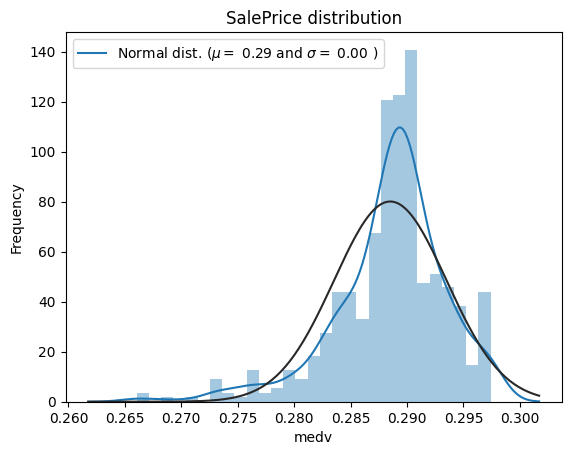

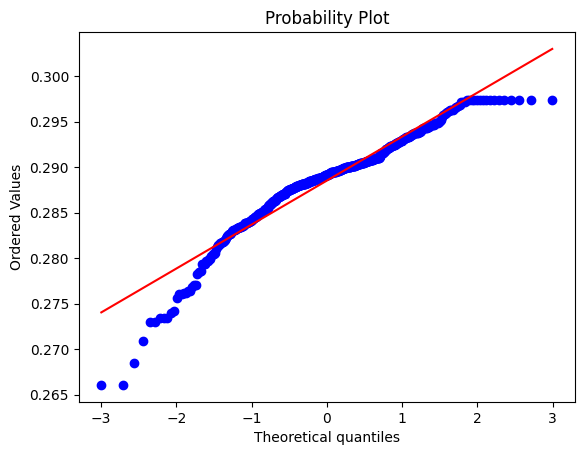

In [104]:
data["medv"] = np.log1p(data["medv"])

sns.distplot(data['medv'] , fit=norm);

(mu, sigma) = norm.fit(data['medv'])
print( '\n mu = {:.2f} and sigma = {:.2f} \n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu =$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(data['medv'], plot=plt)
plt.show()

### Data Correlation

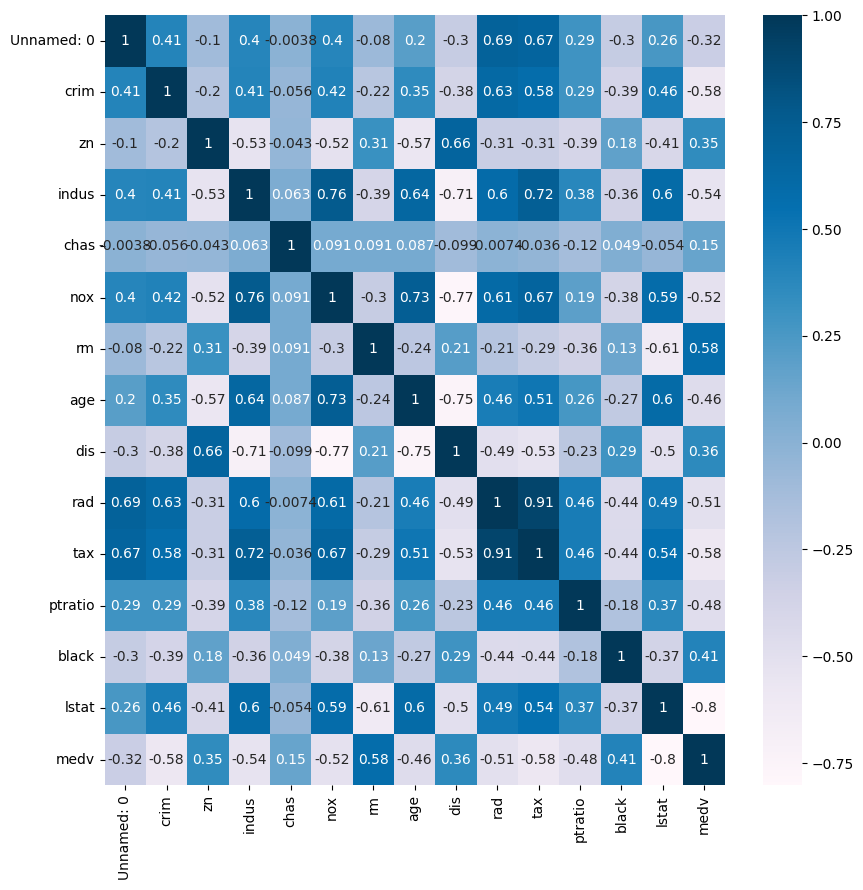

In [105]:
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [112]:
"""
cor_target = abs(cor["medv"]) # absolute value of the correlation 

relevant_features = cor_target[cor_target>0.2] # highly correlated features 

names = [index for index, value in relevant_features.iteritems()] # getting the names of the features 

names.remove('medv') # removing target feature 

print(names) # printing the features 
print(len(names)) 
"""

'\ncor_target = abs(cor["medv"]) # absolute value of the correlation \n\nrelevant_features = cor_target[cor_target>0.2] # highly correlated features \n\nnames = [index for index, value in relevant_features.iteritems()] # getting the names of the features \n\nnames.remove(\'medv\') # removing target feature \n\nprint(names) # printing the features \nprint(len(names)) \n'

### Model Building 

In [113]:
from sklearn.model_selection import train_test_split 

X = data.drop("medv", axis=1) 
y = data["medv"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [114]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 14)
(102, 14)
(404,)
(102,)


In [115]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression() 
lr.fit(X_train, y_train)

LinearRegression()

In [116]:
predictions = lr.predict(X_test)  

print("Actual value of the house:- ", y_test[0]) 
print("Model Predicted Value:- ", predictions[0])

Actual value of the house:-  0.29052393704315743
Model Predicted Value:-  0.2920308493833132


In [117]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions) 
rmse = np.sqrt(mse)
print(rmse)

0.002526381242937909


### THE END

In [119]:
print(sklearn.__version__)

1.3.2
